In [3]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import prettymetrics
from prettymetrics.supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [6]:
df.shape

(8523, 12)

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [10]:
df["Item_Weight"].isnull().sum()

0

In [11]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].value_counts().index[0])

In [13]:
df["Outlet_Size"].isnull().sum()

0

In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.55,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

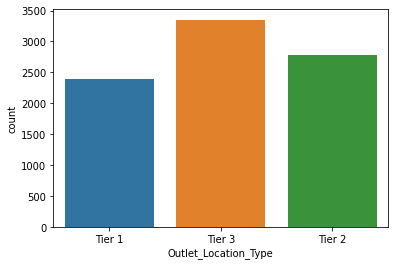

In [16]:
sns.countplot(df.Outlet_Location_Type)

<AxesSubplot:xlabel='Item_Weight'>

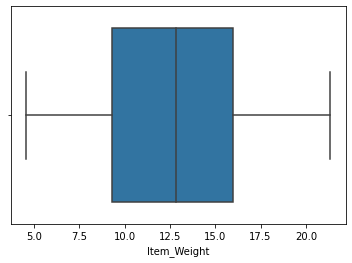

In [17]:
sns.boxplot(df['Item_Weight'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

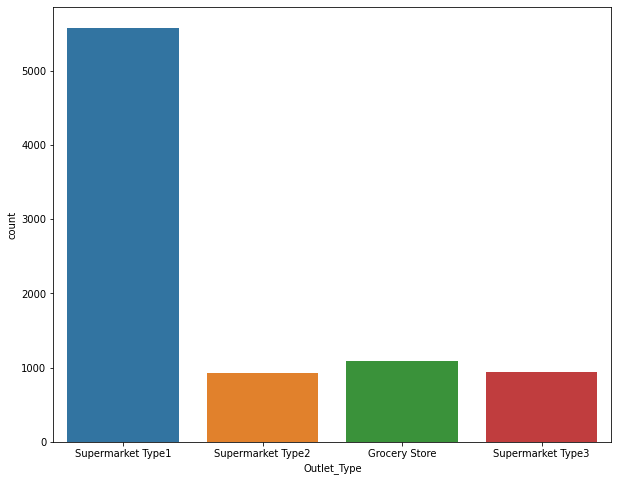

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Type)

In [19]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [20]:
le = preprocessing.LabelEncoder()

In [21]:
label = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Establishment_Year", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

In [22]:
for col in label:
    df[col] = le.fit_transform(df[col])

In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.02,4,249.81,9,4,1,0,1,3735.14
1,8,5.92,2,0.02,14,48.27,3,8,1,2,2,443.42
2,662,17.50,1,0.02,10,141.62,9,4,1,0,1,2097.27
3,1121,19.20,2,0.00,6,182.09,0,3,1,2,0,732.38
4,1297,8.93,1,0.00,9,53.86,1,1,0,2,1,994.71


In [24]:
for col in label:
  print(df[col].unique())

[ 156    8  662 ... 1323 1524 1519]
[1 2 3 0 4]
[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
[9 3 0 1 5 7 2 8 6 4]
[4 8 3 1 0 5 7 2 6]
[1 0 2]
[0 2 1]
[1 2 0 3]


In [25]:
X = df.drop(["Item_Outlet_Sales"], axis = 1)
y = df["Item_Outlet_Sales"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

In [27]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:27<00:00,  2.05it/s]


In [28]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.60,0.60,1069.83,0.82
HistGradientBoostingRegressor,0.57,0.58,1102.05,0.29
LGBMRegressor,0.57,0.57,1104.08,0.08
MLPRegressor,0.57,0.57,1105.90,5.73
RandomForestRegressor,0.54,0.54,1142.09,2.44
ExtraTreesRegressor,0.54,0.54,1145.53,1.35
XGBRegressor,0.52,0.53,1165.97,0.40
KNeighborsRegressor,0.52,0.52,1167.79,0.14
ARDRegression,0.52,0.52,1168.93,0.15


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [37]:
reg.predict(X_test)

array([ 731.36751287,  413.29950126, 3241.36074729, ...,  510.79776872,
       4125.06232224, 2351.6887308 ])

In [38]:
reg.score(X_test, y_test)

0.5994101057982341